## Gradient Boosting for Concrete Strength Prediction

### Part 1 Load Data and Import Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load and prepare data
def load_concrete_data():
    df = pd.read_excel('concrete_data.xls')
    X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
    y = df['Concrete compressive strength(MPa, megapascals) ']
    return X, y

X, y = load_concrete_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Similiar to all of our models, this step loads the data from our dataset to use into this model, our main goal is to gain consisent and high predicition scores on the Concrete compressive strength to aid our hypothetical client.

### Part 2 Configure/Train Model

In [3]:
# Configure and train Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 300],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, 
                         scoring='neg_mean_squared_error',
                         n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

With this step we use piplining stratiges to help improve and aid the Gradient Boosting Model.

### Part 3: Evaluate and Visualize Model


Training Metrics:
MSE: 2.92
R²: 0.99

Testing Metrics:
MSE: 16.89
R²: 0.93


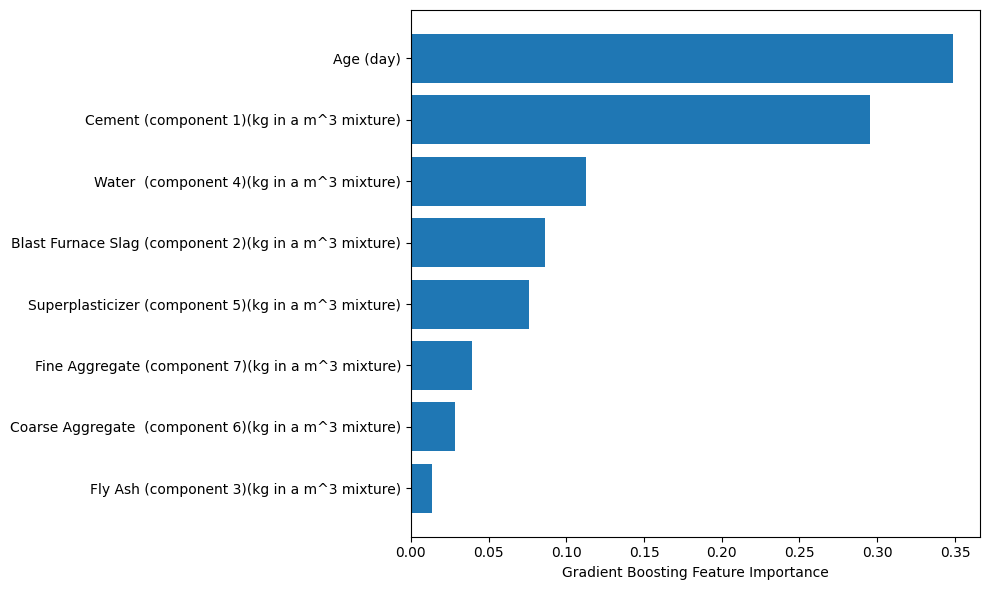

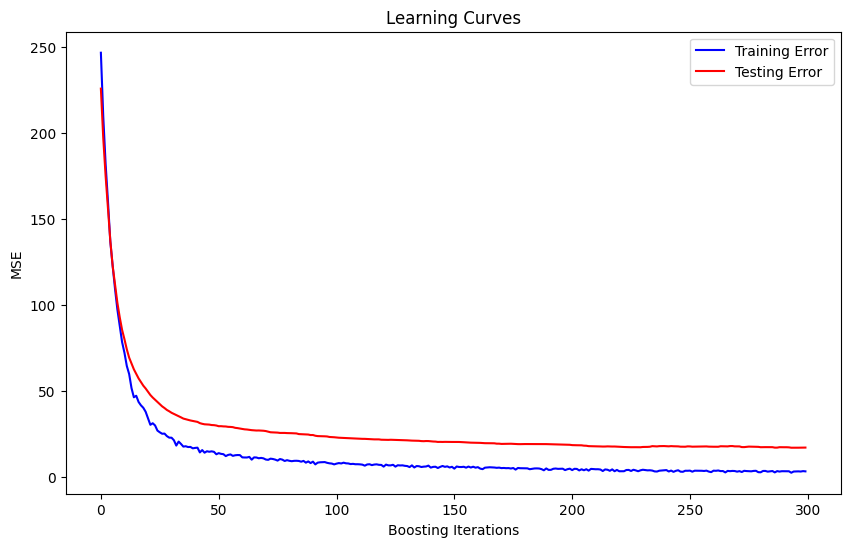

In [4]:
# Get best model
best_gb = grid_search.best_estimator_
joblib.dump(best_gb, 'concrete_gb_model.pkl')  # Save model

# Evaluate model
def print_metrics(y_true, y_pred, label):
    print(f"\n{label} Metrics:")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.2f}")

y_train_pred = best_gb.predict(X_train)
y_test_pred = best_gb.predict(X_test)

print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_test, y_test_pred, "Testing")

# Feature Importance Visualization
plt.figure(figsize=(10, 6))
features = X.columns
importances = best_gb.feature_importances_
sorted_idx = np.argsort(importances)

plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.tight_layout()
plt.show()

# Learning Curve Visualization
test_score = np.zeros((best_gb.n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(best_gb.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(best_gb.train_score_, 'b-', label='Training Error')
plt.plot(test_score, 'r-', label='Testing Error')
plt.legend()
plt.xlabel("Boosting Iterations")
plt.ylabel("MSE")
plt.title("Learning Curves")
plt.show()

As you can see from the results here, the Gradient Boosting model performs well after being trained on its training data. The results we get on the Testing results is a R^2 score of about 0.90, showing that the model has a high success rate. 

We also graphed the feature importancte results to see and view which features are the most important to help identify what factors influence the Concrete compressive strength the most, it seems that age is quite important here.